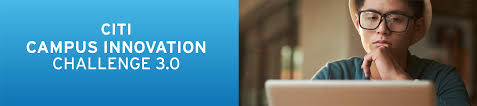


**Rank(AIR): 2nd (CCIC-3.0 FIRST ROUND)**

## **IMPORTING LIBRARIES AND DATASET**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Train.csv to Train.csv


In [ ]:
import io
train = pd.read_csv(io.BytesIO(uploaded['Train.csv']))

## **PREPROCESSING & VISUALIZATION**


In [ ]:
#customer_id - unique Customer id
#seller_id - type of gift (clothes/perfumes/etc.)
#order_checkout_date	- category to which the gift belongs under that gift type
#delivery_eta -	Estimated delivery date
#shipping_charges -	approximate shipping charges to deliver the product based on location
#product_category_code	- The categorical code for the product
#X_1, X_2 -	anonymized columns
#Product_quality_type -	segment of the product based on its quality, for ex: in shoes there maybe, local brand there maybe Nike/Adidas
#Product_mass -	weight of the product
#Product_length, product_height, product_breadth -	dimensions of the product
#Payment_emi_years(max) -	EMI tenure max. available if someone opts for
#Transaction_type -	the type of transaction done for the order
#Order_status -	the status of the order, E = executed successfully, A = Alternate product order later, N = Not Available and cancelled, R = Replacement ordered, H = Address not found and returned
#Coupon_code -	The coupon code that should be recommended to the customer based on the product (Electronics (ELEC), Clothing (CLOTH), etc.)
#Payment_code -	The payment code based on the mode of payment that the customer prefers to use mostly. (Google Play (GPAY), Card Payment (HSBC/HDFC)

train.head()

,customer_id,seller_id,order_checkout_date,delivery_eta,shipping_charges,product_category_code,X_1,X_2,product_quality_type,product_mass,product_length,product_height,product_breadth,payment_emi_years(max),price,order_status,transaction_type,coupon_code,payment_code
0,0a29abf475fb8039d2775913d6f0b6f0,48436dade18ac8b2bce089ec2a041202,2017-08-05 16:59:05,2017-09-06 00:00:00,18.12,27.0,58.0,598.0,D,650,28,9,14,1.0,153.75,E,1,CLOTH20,GPAY20
1,903ac1be571f2dc655f9083ffc936ce6,5b51032eddd242adc84c38acab88f23d,2017-10-30 15:35:32,2017-11-24 00:00:00,20.08,55.0,59.0,695.0,B,3050,33,13,33,1.0,388.17,E,3,CLOTH20,CITI10
2,bfadadd0d97f4c52f859c1c4d809edf9,4a3ca9315b744ce9f8e9374361493884,2017-11-04 12:03:25,2017-11-30 00:00:00,2.29,14.0,54.0,245.0,A,1383,50,10,40,1.0,216.72,E,1,CLOTH20,GPAY20
3,6c9e6937792cc04d9bb23451e0ff9f48,4a3ca9315b744ce9f8e9374361493884,2017-06-15 11:46:47,2017-07-10 00:00:00,1.86,14.0,54.0,245.0,A,1383,50,10,40,1.0,228.95,E,1,CLOTH15,CITI10
4,906e77e04c502baf17ad58162217da39,4a3ca9315b744ce9f8e9374361493884,2018-01-03 09:14:25,2018-01-31 00:00:00,15.57,14.0,54.0,245.0,A,1383,50,10,40,1.0,243.51,E,2,CLOTH15,CITI10


In [ ]:
#drop Customer_id
train.drop('customer_id', axis = 1, inplace = True)

In [ ]:
# order checkout date and delivery date to datetime index
train["delivery_eta"] = pd.to_datetime(train["delivery_eta"])
train["delivery_eta"]
train["order_checkout_date"] = pd.to_datetime(train["order_checkout_date"])
train["order_checkout_date"]

0      2017-08-05 16:59:05
1      2017-10-30 15:35:32
2      2017-11-04 12:03:25
3      2017-06-15 11:46:47
4      2018-01-03 09:14:25
               ...        
8004   2017-09-21 08:13:45
8005   2017-09-20 06:20:32
8006   2017-02-20 08:19:21
8007   2017-03-24 00:28:52
8008   2017-07-18 12:56:38
Name: order_checkout_date, Length: 8009, dtype: datetime64[ns]

In [ ]:
# finding the time difference between the checkout date and the estimated delivery date and later expressing the difference in terms of days 
train['time'] = train['delivery_eta'].sub(train['order_checkout_date'], axis=0)
train.head()

,seller_id,order_checkout_date,delivery_eta,shipping_charges,product_category_code,X_1,X_2,product_quality_type,product_mass,product_length,product_height,product_breadth,payment_emi_years(max),price,order_status,transaction_type,coupon_code,payment_code,time
0,48436dade18ac8b2bce089ec2a041202,2017-08-05 16:59:05,2017-09-06,18.12,27.0,58.0,598.0,D,650,28,9,14,1.0,153.75,E,1,CLOTH20,GPAY20,31 days 07:00:55
1,5b51032eddd242adc84c38acab88f23d,2017-10-30 15:35:32,2017-11-24,20.08,55.0,59.0,695.0,B,3050,33,13,33,1.0,388.17,E,3,CLOTH20,CITI10,24 days 08:24:28
2,4a3ca9315b744ce9f8e9374361493884,2017-11-04 12:03:25,2017-11-30,2.29,14.0,54.0,245.0,A,1383,50,10,40,1.0,216.72,E,1,CLOTH20,GPAY20,25 days 11:56:35
3,4a3ca9315b744ce9f8e9374361493884,2017-06-15 11:46:47,2017-07-10,1.86,14.0,54.0,245.0,A,1383,50,10,40,1.0,228.95,E,1,CLOTH15,CITI10,24 days 12:13:13
4,4a3ca9315b744ce9f8e9374361493884,2018-01-03 09:14:25,2018-01-31,15.57,14.0,54.0,245.0,A,1383,50,10,40,1.0,243.51,E,2,CLOTH15,CITI10,27 days 14:45:35


In [ ]:
train["time"]

0      31 days 07:00:55
1      24 days 08:24:28
2      25 days 11:56:35
3      24 days 12:13:13
4      27 days 14:45:35
             ...       
8004   14 days 15:46:15
8005   12 days 17:39:28
8006   30 days 15:40:39
8007   24 days 23:31:08
8008   12 days 11:03:22
Name: time, Length: 8009, dtype: timedelta64[ns]

In [ ]:
train["day_diff"] = train["time"].dt.days
train

,seller_id,order_checkout_date,delivery_eta,shipping_charges,product_category_code,X_1,X_2,product_quality_type,product_mass,product_length,product_height,product_breadth,payment_emi_years(max),price,order_status,transaction_type,coupon_code,payment_code,time,day_diff
0,48436dade18ac8b2bce089ec2a041202,2017-08-05 16:59:05,2017-09-06,18.12,27.0,58.0,598.0,D,650,28,9,14,1.0,153.75,E,1,CLOTH20,GPAY20,31 days 07:00:55,31
1,5b51032eddd242adc84c38acab88f23d,2017-10-30 15:35:32,2017-11-24,20.08,55.0,59.0,695.0,B,3050,33,13,33,1.0,388.17,E,3,CLOTH20,CITI10,24 days 08:24:28,24
2,4a3ca9315b744ce9f8e9374361493884,2017-11-04 12:03:25,2017-11-30,2.29,14.0,54.0,245.0,A,1383,50,10,40,1.0,216.72,E,1,CLOTH20,GPAY20,25 days 11:56:35,25
3,4a3ca9315b744ce9f8e9374361493884,2017-06-15 11:46:47,2017-07-10,1.86,14.0,54.0,245.0,A,1383,50,10,40,1.0,228.95,E,1,CLOTH15,CITI10,24 days 12:13:13,24
4,4a3ca9315b744ce9f8e9374361493884,2018-01-03 09:14:25,2018-01-31,15.57,14.0,54.0,245.0,A,1383,50,10,40,1.0,243.51,E,2,CLOTH15,CITI10,27 days 14:45:35,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8004,a49928bcdf77c55c6d6e05e09a9b4ca5,2017-09-21 08:13:45,2017-10-06,11.76,13.0,59.0,249.0,B,1500,40,25,20,1.0,91.66,E,3,ELEC10,CITI10,14 days 15:46:15,14
8005,a49928bcdf77c55c6d6e05e09a9b4ca5,2017-09-20 06:20:32,2017-10-03,11.76,13.0,59.0,249.0,B,1500,40,25,20,1.0,91.66,E,5,ELEC15,CITI10,12 days 17:39:28,12
8006,fa1c13f2614d7b5c4749cbc52fecda94,2017-02-20 08:19:21,2017-03-23,15.15,67.0,56.0,741.0,B,300,16,11,11,1.0,155.05,E,6,ELEC15,CITI10,30 days 15:40:39,30
8007,fa1c13f2614d7b5c4749cbc52fecda94,2017-03-24 00:28:52,2017-04-18,15.10,67.0,56.0,741.0,B,300,16,11,11,1.0,148.03,E,5,ELEC15,CITI10,24 days 23:31:08,24


In [ ]:
#dropping extra variables
train.drop('order_checkout_date', axis = 1, inplace = True)
train.drop('delivery_eta', axis = 1, inplace = True)
train.drop('time', axis = 1, inplace = True)

In [ ]:
#resultant coulmns 17 with 8009 rows
train.shape

(8009, 17)

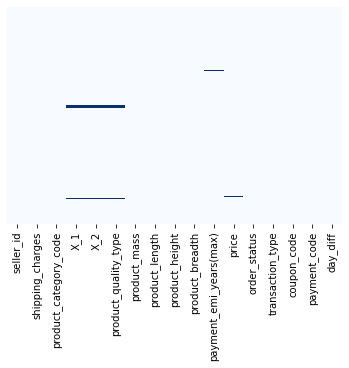

In [ ]:
#visualizing the null or missing values using heatmap
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [ ]:
#the missing values for each variables
train.isnull().sum()

seller_id                   0
shipping_charges           14
product_category_code      23
X_1                       138
X_2                       138
product_quality_type      138
product_mass                0
product_length              0
product_height              0
product_breadth             0
payment_emi_years(max)     15
price                      10
order_status                0
transaction_type            0
coupon_code                 0
payment_code                0
day_diff                    0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8009 entries, 0 to 8008
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   seller_id               8009 non-null   object 
 1   shipping_charges        7995 non-null   float64
 2   product_category_code   7986 non-null   float64
 3   X_1                     7871 non-null   float64
 4   X_2                     7871 non-null   float64
 5   product_quality_type    7871 non-null   object 
 6   product_mass            8009 non-null   int64  
 7   product_length          8009 non-null   int64  
 8   product_height          8009 non-null   int64  
 9   product_breadth         8009 non-null   int64  
 10  payment_emi_years(max)  7994 non-null   float64
 11  price                   7999 non-null   float64
 12  order_status            8009 non-null   object 
 13  transaction_type        8009 non-null   int64  
 14  coupon_code             8009 non-null   

In [ ]:
#treating missing values with 0 for product_category_code,X_1 and X_2  
#mode used to fill null values of product_quality_type as it is a categorical variable
train['product_category_code'] = train['product_category_code'].fillna(0)
train['X_1'] = train['X_2'].fillna(0)
train['X_2'] = train['X_2'].fillna(0)
train['product_quality_type'] = train['product_quality_type'].fillna(train['product_quality_type'].mode()[0])

In [ ]:
#checking for remaining missing values in the int variables
train.isnull().sum()

seller_id                  0
shipping_charges          14
product_category_code      0
X_1                        0
X_2                        0
product_quality_type       0
product_mass               0
product_length             0
product_height             0
product_breadth            0
payment_emi_years(max)    15
price                     10
order_status               0
transaction_type           0
coupon_code                0
payment_code               0
day_diff                   0
dtype: int64

In [ ]:
#null values imputed with median for avoiding biases generated from presence of outliers
train.fillna(train.median(), inplace=True)

In [ ]:
train

,seller_id,shipping_charges,product_category_code,X_1,X_2,product_quality_type,product_mass,product_length,product_height,product_breadth,payment_emi_years(max),price,order_status,transaction_type,coupon_code,payment_code,day_diff
0,48436dade18ac8b2bce089ec2a041202,18.12,27.0,598.0,598.0,D,650,28,9,14,1.0,153.75,E,1,CLOTH20,GPAY20,31
1,5b51032eddd242adc84c38acab88f23d,20.08,55.0,695.0,695.0,B,3050,33,13,33,1.0,388.17,E,3,CLOTH20,CITI10,24
2,4a3ca9315b744ce9f8e9374361493884,2.29,14.0,245.0,245.0,A,1383,50,10,40,1.0,216.72,E,1,CLOTH20,GPAY20,25
3,4a3ca9315b744ce9f8e9374361493884,1.86,14.0,245.0,245.0,A,1383,50,10,40,1.0,228.95,E,1,CLOTH15,CITI10,24
4,4a3ca9315b744ce9f8e9374361493884,15.57,14.0,245.0,245.0,A,1383,50,10,40,1.0,243.51,E,2,CLOTH15,CITI10,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8004,a49928bcdf77c55c6d6e05e09a9b4ca5,11.76,13.0,249.0,249.0,B,1500,40,25,20,1.0,91.66,E,3,ELEC10,CITI10,14
8005,a49928bcdf77c55c6d6e05e09a9b4ca5,11.76,13.0,249.0,249.0,B,1500,40,25,20,1.0,91.66,E,5,ELEC15,CITI10,12
8006,fa1c13f2614d7b5c4749cbc52fecda94,15.15,67.0,741.0,741.0,B,300,16,11,11,1.0,155.05,E,6,ELEC15,CITI10,30
8007,fa1c13f2614d7b5c4749cbc52fecda94,15.10,67.0,741.0,741.0,B,300,16,11,11,1.0,148.03,E,5,ELEC15,CITI10,24


In [ ]:
#Null values are treated
train.isnull().sum()

seller_id                 0
shipping_charges          0
product_category_code     0
X_1                       0
X_2                       0
product_quality_type      0
product_mass              0
product_length            0
product_height            0
product_breadth           0
payment_emi_years(max)    0
price                     0
order_status              0
transaction_type          0
coupon_code               0
payment_code              0
day_diff                  0
dtype: int64

In [ ]:
#Treating the categorical variables by assigning numeric values to each categories within the same variable using Label Encoding
object_cols = list(train.select_dtypes(['object']).columns)

from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data 
label_train1 = train.copy()
from collections import defaultdict 

labelencoder = defaultdict(list) 
# Apply label encoder to each column with categorical data
for col in object_cols:
    label_encoder = LabelEncoder()
    labelencoder[col]= label_encoder
    print(col)
    label_train1[col] = label_encoder.fit_transform(train[col])

    
label_train1

seller_id
product_quality_type
order_status
coupon_code
payment_code


,seller_id,shipping_charges,product_category_code,X_1,X_2,product_quality_type,product_mass,product_length,product_height,product_breadth,payment_emi_years(max),price,order_status,transaction_type,coupon_code,payment_code,day_diff
0,140,18.12,27.0,598.0,598.0,3,650,28,9,14,1.0,153.75,1,1,1,2,31
1,181,20.08,55.0,695.0,695.0,1,3050,33,13,33,1.0,388.17,1,3,1,1,24
2,146,2.29,14.0,245.0,245.0,0,1383,50,10,40,1.0,216.72,1,1,1,2,25
3,146,1.86,14.0,245.0,245.0,0,1383,50,10,40,1.0,228.95,1,1,0,1,24
4,146,15.57,14.0,245.0,245.0,0,1383,50,10,40,1.0,243.51,1,2,0,1,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8004,327,11.76,13.0,249.0,249.0,1,1500,40,25,20,1.0,91.66,1,3,3,1,14
8005,327,11.76,13.0,249.0,249.0,1,1500,40,25,20,1.0,91.66,1,5,4,1,12
8006,492,15.15,67.0,741.0,741.0,1,300,16,11,11,1.0,155.05,1,6,4,1,30
8007,492,15.10,67.0,741.0,741.0,1,300,16,11,11,1.0,148.03,1,5,4,1,24


In [ ]:
#Allocation of data points of all variables for each categories of coupon code
labelencoder['coupon_code'].inverse_transform([1,2,3,4])

array(['CLOTH20', 'COSMETICS25', 'ELEC10', 'ELEC15'], dtype=object)

In [ ]:
#Allocation of data points of all variables for each categories of payment code
label_train1.coupon_code.describe()


count    8009.000000
mean        3.272568
std         1.206769
min         0.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: coupon_code, dtype: float64

In [ ]:
#Allocation of data points of all variables for each categories of coupon code
label_train1.groupby('coupon_code').count()

,seller_id,shipping_charges,product_category_code,X_1,X_2,product_quality_type,product_mass,product_length,product_height,product_breadth,payment_emi_years(max),price,order_status,transaction_type,payment_code,day_diff
coupon_code,,,,,,,,,,,,,,,,
0,577,577,577,577,577,577,577,577,577,577,577,577,577,577,577,577
1,478,478,478,478,478,478,478,478,478,478,478,478,478,478,478,478
2,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,2181,2181,2181,2181,2181,2181,2181,2181,2181,2181,2181,2181,2181,2181,2181,2181
4,4690,4690,4690,4690,4690,4690,4690,4690,4690,4690,4690,4690,4690,4690,4690,4690
5,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49
6,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29


In [ ]:
#Allocation of data points of all variables for each categories of payment code
label_train1.groupby('payment_code').count()

,seller_id,shipping_charges,product_category_code,X_1,X_2,product_quality_type,product_mass,product_length,product_height,product_breadth,payment_emi_years(max),price,order_status,transaction_type,coupon_code,day_diff
payment_code,,,,,,,,,,,,,,,,
0,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185
1,5981,5981,5981,5981,5981,5981,5981,5981,5981,5981,5981,5981,5981,5981,5981,5981
2,841,841,841,841,841,841,841,841,841,841,841,841,841,841,841,841
3,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140
4,862,862,862,862,862,862,862,862,862,862,862,862,862,862,862,862


In [ ]:
#No of columns in our dataset
n = len(label_train1.columns)
n

17

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

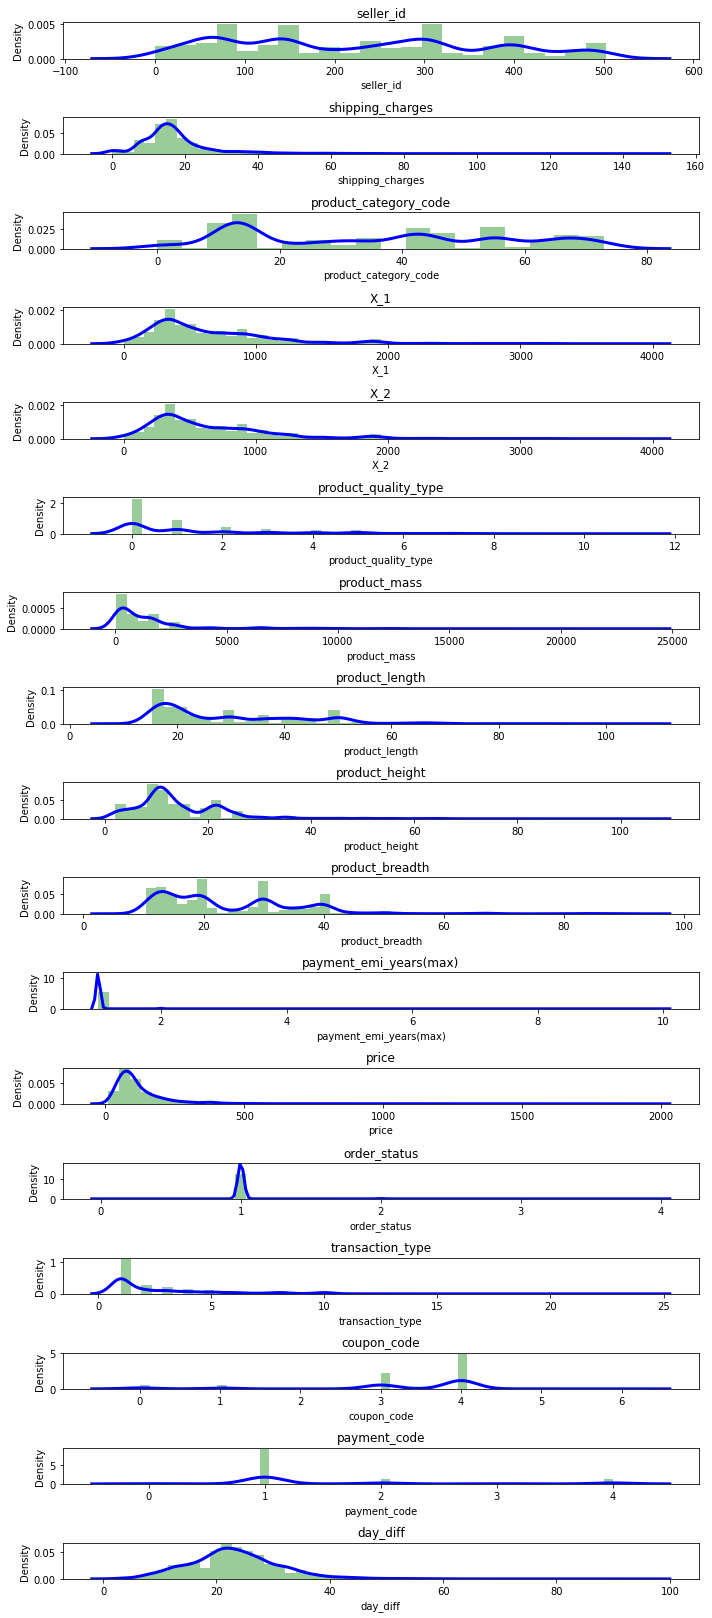

In [ ]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(10,100))
for i in range(len(label_train1.columns)):
  plt.subplot(76, 1, i+1)
  sns.distplot(label_train1[label_train1.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(label_train1.columns[i])

plt.tight_layout()

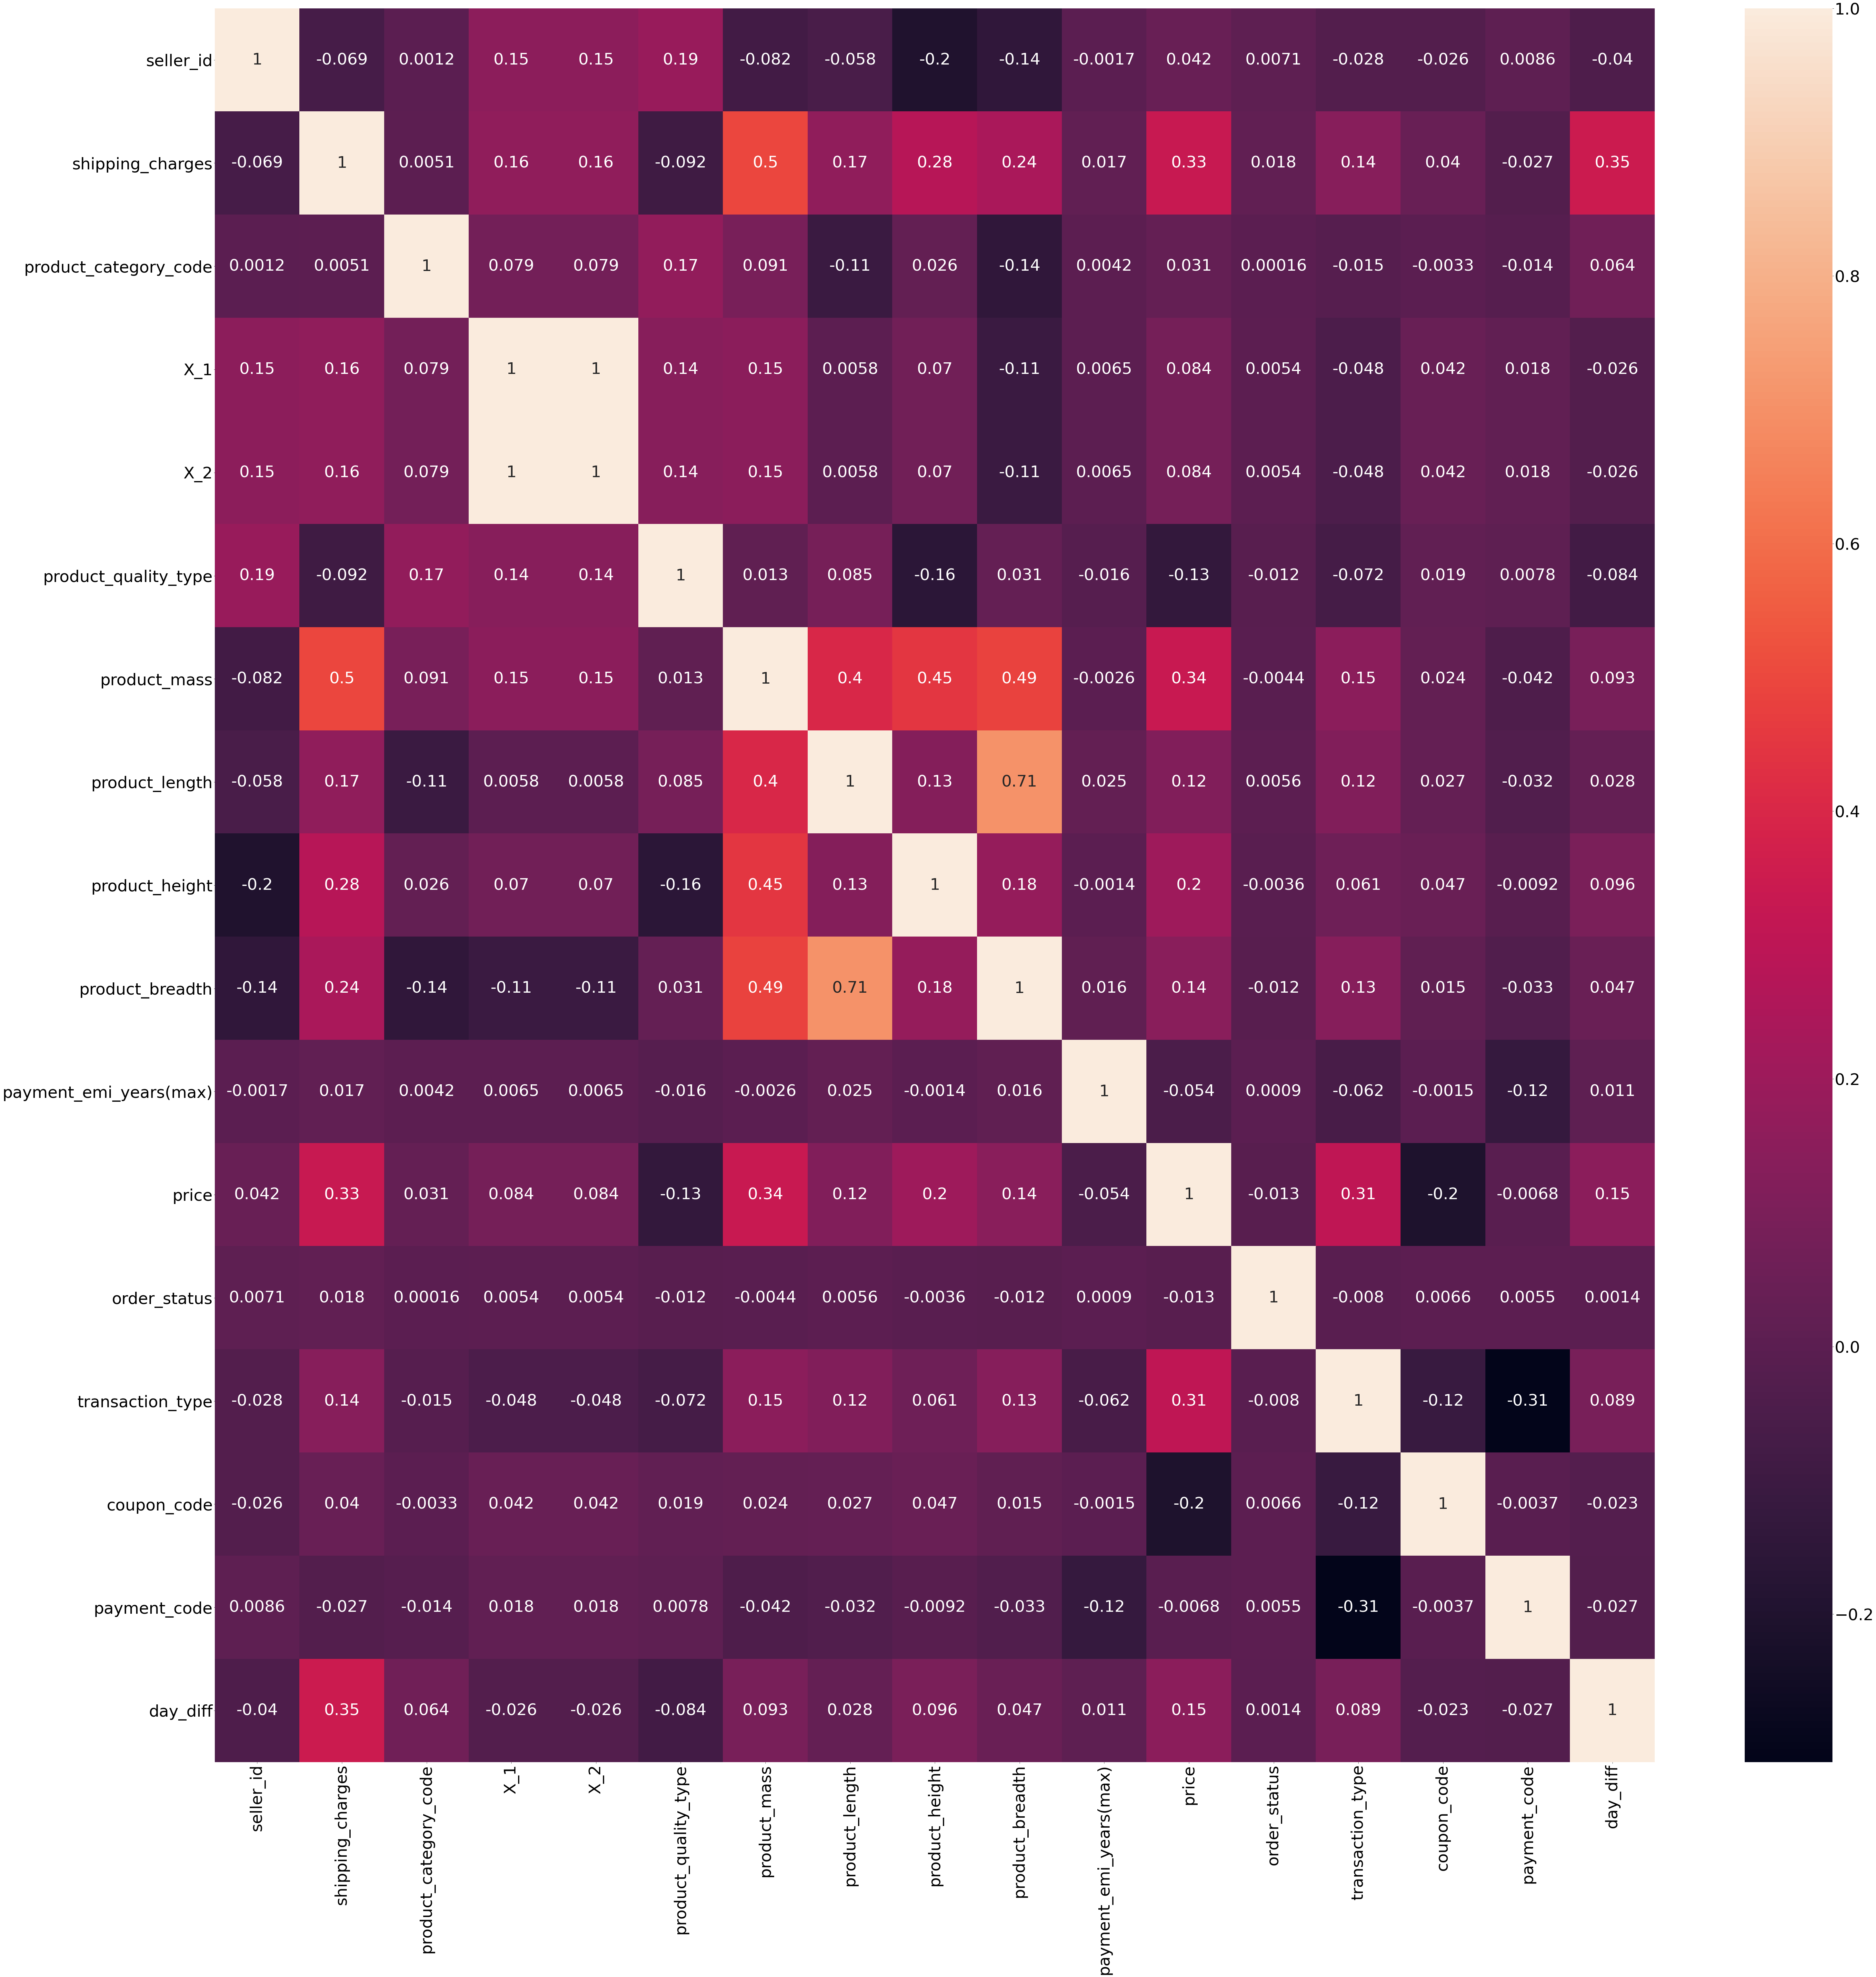

In [ ]:
#product dimensions highly correlated with each other

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 50})
corr_matrix = label_train1.corr()
plt.figure(figsize = (100,100))
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [ ]:
# Transformation of variables 
label_train1["product_volume"] = label_train1["product_length"] *  label_train1["product_breadth"] *  label_train1["product_height"]
label_train1["product_density"] =  label_train1["product_mass"] /   label_train1["product_volume"]
label_train1["ship-charges-per-day"] =  label_train1["shipping_charges"] /   label_train1["day_diff"]
label_train1["ship-charges/price"] =  label_train1["shipping_charges"] /   label_train1["price"]
label_train1


,seller_id,shipping_charges,product_category_code,X_1,X_2,product_quality_type,product_mass,product_length,product_height,product_breadth,payment_emi_years(max),price,order_status,transaction_type,coupon_code,payment_code,day_diff,product_volume,product_density,ship-charges-per-day,ship-charges/price
0,140,18.12,27.0,598.0,598.0,3,650,28,9,14,1.0,153.75,1,1,1,2,31,3528,0.184240,0.584516,0.117854
1,181,20.08,55.0,695.0,695.0,1,3050,33,13,33,1.0,388.17,1,3,1,1,24,14157,0.215441,0.836667,0.051730
2,146,2.29,14.0,245.0,245.0,0,1383,50,10,40,1.0,216.72,1,1,1,2,25,20000,0.069150,0.091600,0.010567
3,146,1.86,14.0,245.0,245.0,0,1383,50,10,40,1.0,228.95,1,1,0,1,24,20000,0.069150,0.077500,0.008124
4,146,15.57,14.0,245.0,245.0,0,1383,50,10,40,1.0,243.51,1,2,0,1,27,20000,0.069150,0.576667,0.063940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8004,327,11.76,13.0,249.0,249.0,1,1500,40,25,20,1.0,91.66,1,3,3,1,14,20000,0.075000,0.840000,0.128300
8005,327,11.76,13.0,249.0,249.0,1,1500,40,25,20,1.0,91.66,1,5,4,1,12,20000,0.075000,0.980000,0.128300
8006,492,15.15,67.0,741.0,741.0,1,300,16,11,11,1.0,155.05,1,6,4,1,30,1936,0.154959,0.505000,0.097710
8007,492,15.10,67.0,741.0,741.0,1,300,16,11,11,1.0,148.03,1,5,4,1,24,1936,0.154959,0.629167,0.102006


In [ ]:
#Dropping extra variables with less  significance in our model 
label_train1.drop('product_length', axis = 1, inplace = True)
label_train1.drop('product_breadth', axis = 1, inplace = True)
label_train1.drop('product_height', axis = 1, inplace = True)
label_train1.drop('product_mass', axis = 1, inplace = True)
label_train1.drop('product_volume', axis = 1, inplace = True)
label_train1.drop('shipping_charges', axis = 1, inplace = True)
label_train1.drop('price', axis = 1, inplace = True)
label_train1.drop('day_diff', axis = 1, inplace = True)
label_train1.drop('X_1', axis = 1, inplace = True)
# label_train1.drop('X_2', axis = 1, inplace = True)

In [ ]:
label_train1

,seller_id,product_category_code,X_2,product_quality_type,payment_emi_years(max),order_status,transaction_type,coupon_code,payment_code,product_density,ship-charges-per-day,ship-charges/price
0,140,27.0,598.0,3,1.0,1,1,1,2,0.184240,0.584516,0.117854
1,181,55.0,695.0,1,1.0,1,3,1,1,0.215441,0.836667,0.051730
2,146,14.0,245.0,0,1.0,1,1,1,2,0.069150,0.091600,0.010567
3,146,14.0,245.0,0,1.0,1,1,0,1,0.069150,0.077500,0.008124
4,146,14.0,245.0,0,1.0,1,2,0,1,0.069150,0.576667,0.063940
...,...,...,...,...,...,...,...,...,...,...,...,...
8004,327,13.0,249.0,1,1.0,1,3,3,1,0.075000,0.840000,0.128300
8005,327,13.0,249.0,1,1.0,1,5,4,1,0.075000,0.980000,0.128300
8006,492,67.0,741.0,1,1.0,1,6,4,1,0.154959,0.505000,0.097710
8007,492,67.0,741.0,1,1.0,1,5,4,1,0.154959,0.629167,0.102006


In [ ]:
label_train1.shape

(8009, 12)

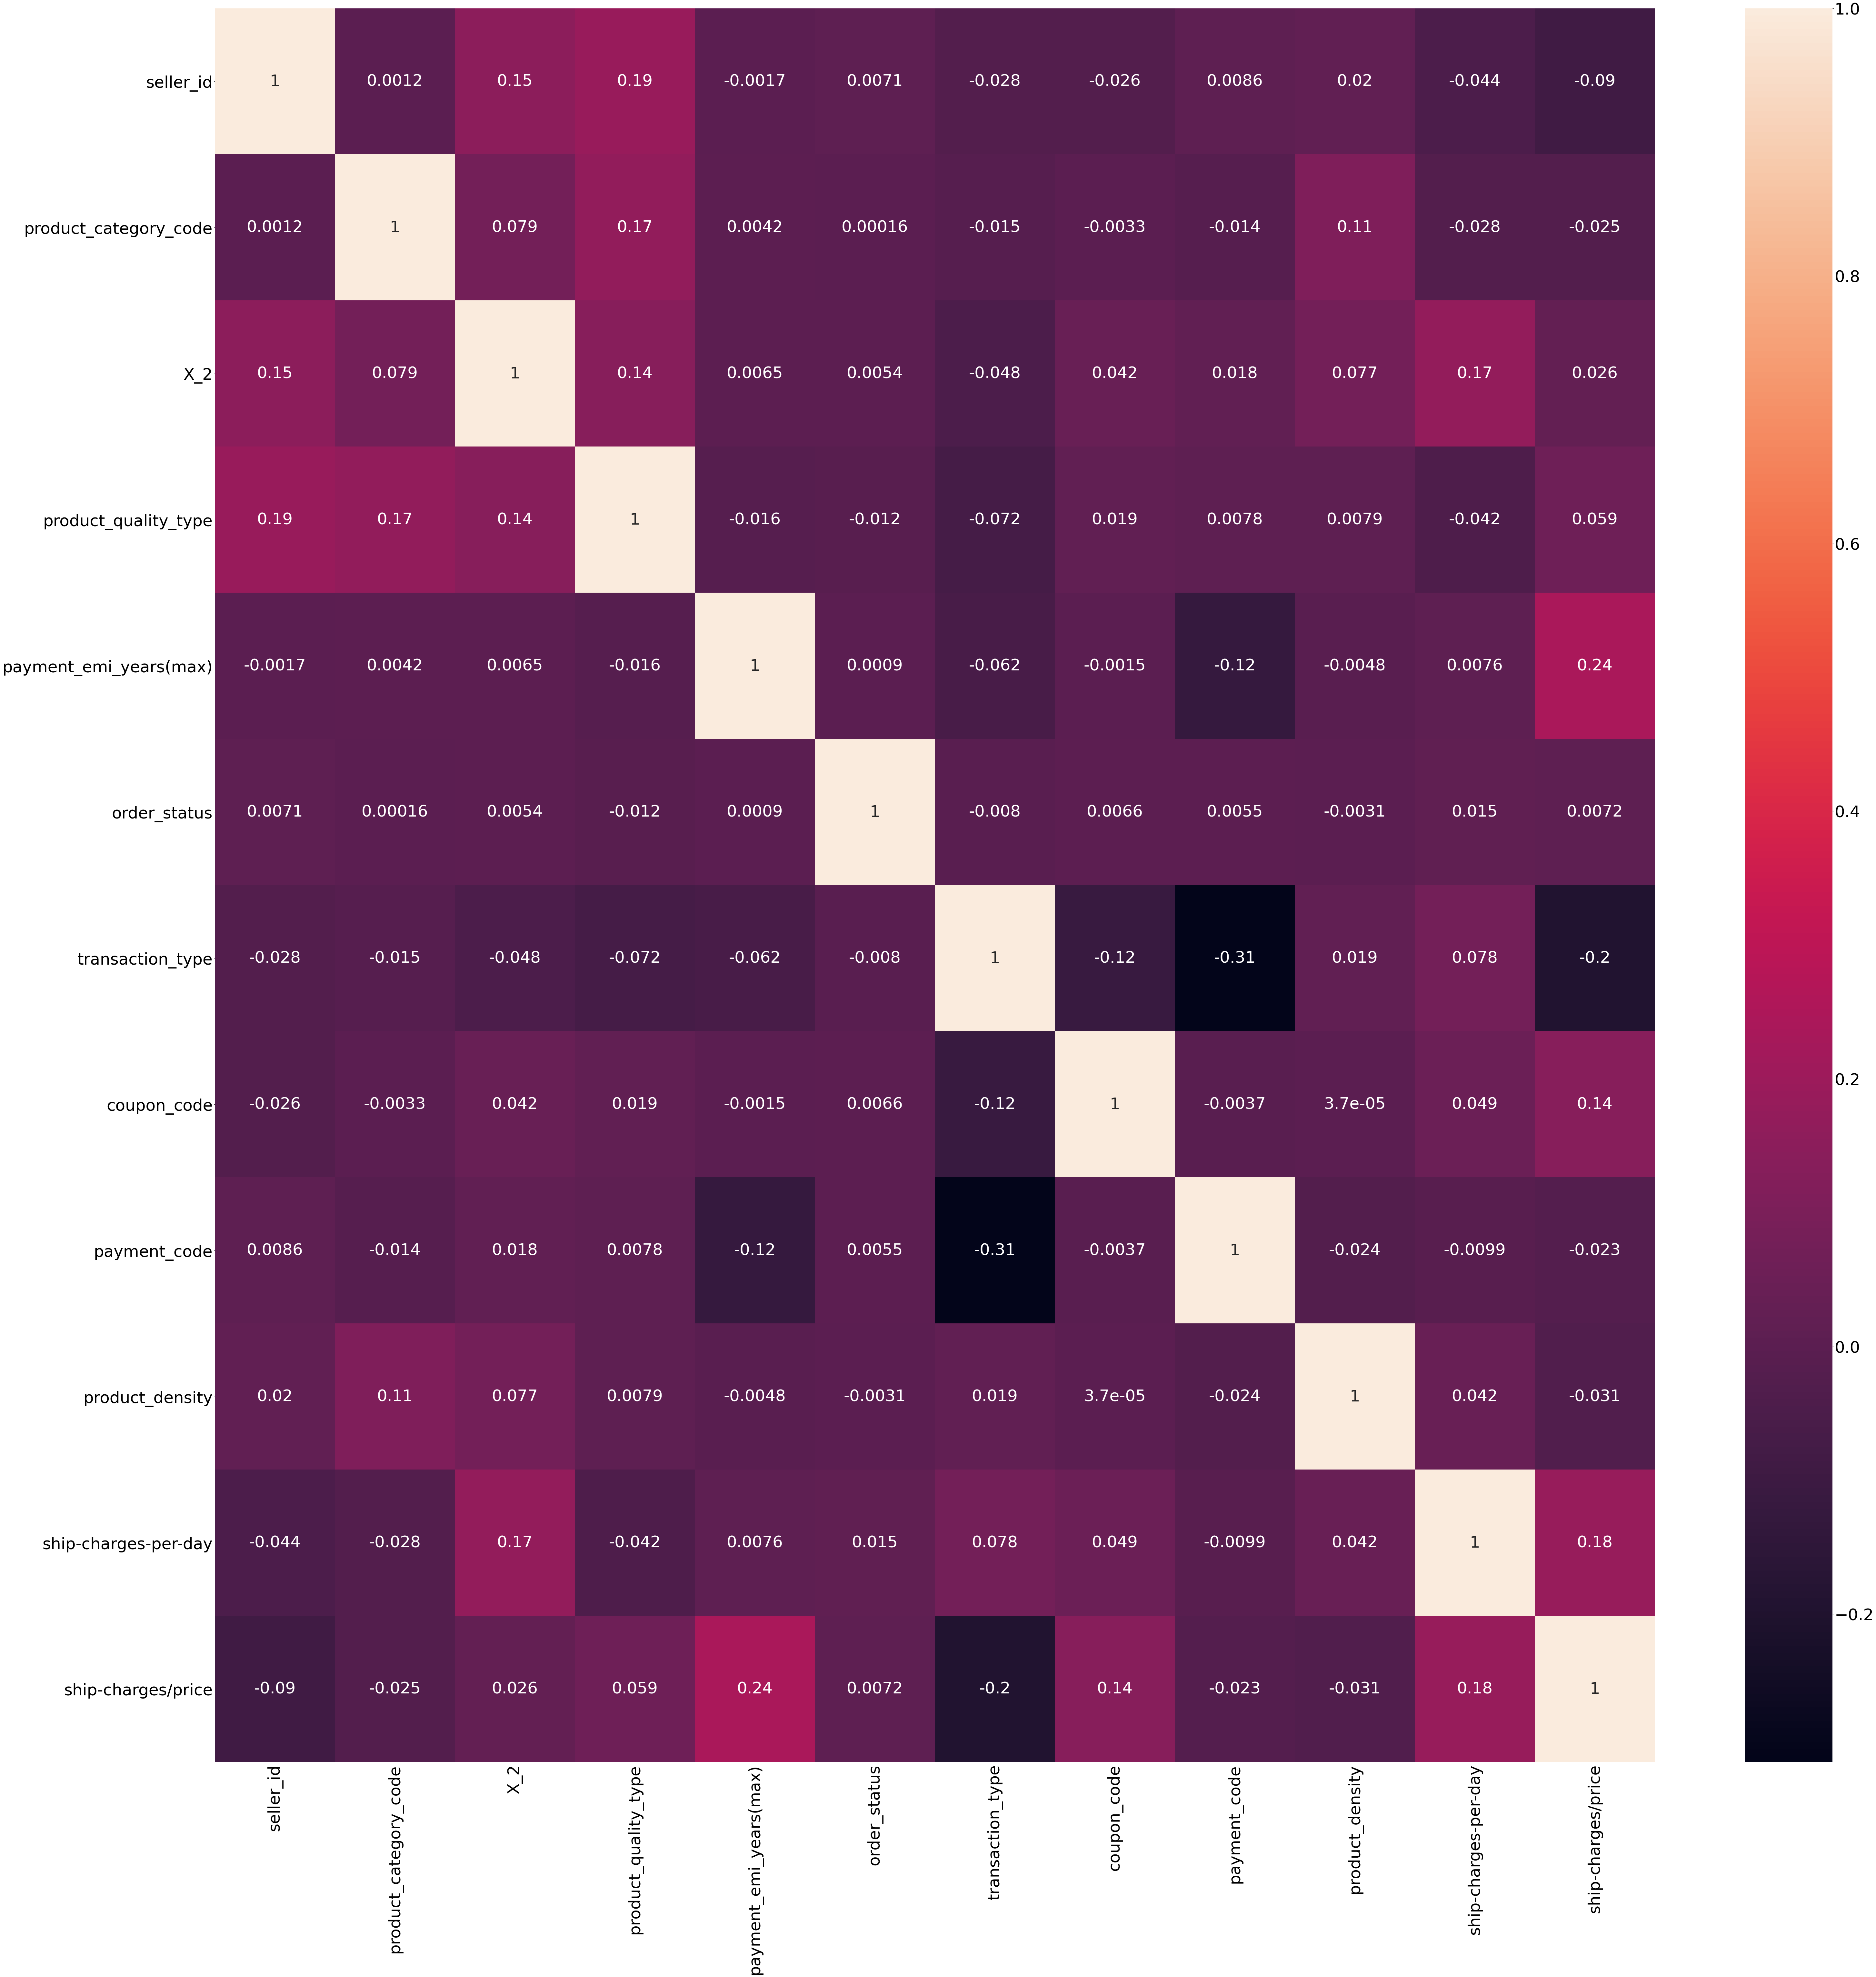

In [ ]:
#New correlation matrix with transformed variables which led to effective removal of the issue of multicollinearity
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 50})
corr_matrix = label_train1.corr()
plt.figure(figsize = (100,100))
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [ ]:
# Labeling the train data
X= label_train1.drop(columns = ['payment_code','coupon_code'])
Z= label_train1['payment_code']
P= label_train1['coupon_code']

## **Treating test data**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Test.csv to Test.csv


In [ ]:
import io
test = pd.read_csv(io.BytesIO(uploaded['Test.csv']))

In [ ]:
test.head()

,customer_id,seller_id,order_checkout_date,delivery_eta,shipping_charges,product_category_code,X_1,X_2,product_quality_type,product_mass,product_length,product_height,product_breadth,payment_emi_years(max),price,order_status,transaction_type
0,d6b757c9478ed7366a42b6f09dce476f,d93919c944be9cff128f6c9cb899eacb,2017-12-20 23:34:29,2018-01-15 00:00:00,18.38,7.0,39.0,749.0,A,4450,50,8,45,1.0,88.28,E,1
1,9c224bc2354a4e8ecbd390cba06b5d07,d93919c944be9cff128f6c9cb899eacb,2018-01-07 16:38:24,2018-02-23 00:00:00,50.15,7.0,39.0,749.0,A,4450,50,8,45,1.0,120.05,E,2
2,5551ca919431fc78c6bb85ee6f57c904,d93919c944be9cff128f6c9cb899eacb,2018-01-06 13:23:46,2018-02-01 00:00:00,18.38,7.0,39.0,749.0,A,4450,50,8,45,1.0,88.28,E,1
3,77b4e2a15303756cc2a3b4a5d2dd3460,d93919c944be9cff128f6c9cb899eacb,2018-02-07 23:55:11,2018-03-19 00:00:00,39.55,7.0,39.0,749.0,A,4450,50,8,45,1.0,119.45,E,2
4,6b9c954ac26835161d0f34df89ca1175,23613d49c3ac2bd302259e55c06c050c,2018-02-04 12:11:39,2018-03-01 00:00:00,11.85,55.0,39.0,161.0,C,200,20,20,20,1.0,45.50,E,2


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6218 entries, 0 to 6217
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             6218 non-null   object 
 1   seller_id               6218 non-null   object 
 2   order_checkout_date     6218 non-null   object 
 3   delivery_eta            6218 non-null   object 
 4   shipping_charges        6194 non-null   float64
 5   product_category_code   6202 non-null   float64
 6   X_1                     6134 non-null   float64
 7   X_2                     6134 non-null   float64
 8   product_quality_type    6134 non-null   object 
 9   product_mass            6218 non-null   int64  
 10  product_length          6218 non-null   int64  
 11  product_height          6218 non-null   int64  
 12  product_breadth         6218 non-null   int64  
 13  payment_emi_years(max)  6204 non-null   float64
 14  price                   6203 non-null   

In [ ]:
# Identifying null values in test set
test.isnull().sum()

customer_id                0
seller_id                  0
order_checkout_date        0
delivery_eta               0
shipping_charges          24
product_category_code     16
X_1                       84
X_2                       84
product_quality_type      84
product_mass               0
product_length             0
product_height             0
product_breadth            0
payment_emi_years(max)    14
price                     15
order_status               0
transaction_type           0
dtype: int64

In [ ]:
# Treating the missing values by filling them with 0s and mode
test['product_category_code'] = test['product_category_code'].fillna(0)
test['X_1'] = test['X_2'].fillna(0)
test['X_2'] = test['X_2'].fillna(0)
test['product_quality_type'] = test['product_quality_type'].fillna(test['product_quality_type'].mode()[0])

In [ ]:
test.isnull().sum()

customer_id                0
seller_id                  0
order_checkout_date        0
delivery_eta               0
shipping_charges          24
product_category_code      0
X_1                        0
X_2                        0
product_quality_type       0
product_mass               0
product_length             0
product_height             0
product_breadth            0
payment_emi_years(max)    14
price                     15
order_status               0
transaction_type           0
dtype: int64

In [ ]:
# filling the continous variables null values with median
test.fillna(test.median(), inplace=True)

In [ ]:
test

,customer_id,seller_id,order_checkout_date,delivery_eta,shipping_charges,product_category_code,X_1,X_2,product_quality_type,product_mass,product_length,product_height,product_breadth,payment_emi_years(max),price,order_status,transaction_type
0,d6b757c9478ed7366a42b6f09dce476f,d93919c944be9cff128f6c9cb899eacb,2017-12-20 23:34:29,2018-01-15 00:00:00,18.38,7.0,749.0,749.0,A,4450,50,8,45,1.0,88.28,E,1
1,9c224bc2354a4e8ecbd390cba06b5d07,d93919c944be9cff128f6c9cb899eacb,2018-01-07 16:38:24,2018-02-23 00:00:00,50.15,7.0,749.0,749.0,A,4450,50,8,45,1.0,120.05,E,2
2,5551ca919431fc78c6bb85ee6f57c904,d93919c944be9cff128f6c9cb899eacb,2018-01-06 13:23:46,2018-02-01 00:00:00,18.38,7.0,749.0,749.0,A,4450,50,8,45,1.0,88.28,E,1
3,77b4e2a15303756cc2a3b4a5d2dd3460,d93919c944be9cff128f6c9cb899eacb,2018-02-07 23:55:11,2018-03-19 00:00:00,39.55,7.0,749.0,749.0,A,4450,50,8,45,1.0,119.45,E,2
4,6b9c954ac26835161d0f34df89ca1175,23613d49c3ac2bd302259e55c06c050c,2018-02-04 12:11:39,2018-03-01 00:00:00,11.85,55.0,161.0,161.0,C,200,20,20,20,1.0,45.50,E,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6213,6c5aeca0152670c75e44c9c67eb7c1f3,1900267e848ceeba8fa32d80c1a5f5a8,2018-01-22 15:24:44,2018-02-14 00:00:00,12.71,14.0,560.0,560.0,A,650,16,10,16,1.0,65.71,E,2
6214,ad73e36af463651cb09bd467d37acf58,1900267e848ceeba8fa32d80c1a5f5a8,2018-06-12 21:08:04,2018-07-04 00:00:00,13.95,14.0,560.0,560.0,A,650,16,10,16,1.0,66.95,E,6
6215,34dce5cd72cbdc18a08cfead93190b41,1900267e848ceeba8fa32d80c1a5f5a8,2018-03-29 10:04:18,2018-04-23 00:00:00,19.34,14.0,560.0,560.0,A,650,16,10,16,1.0,72.34,E,1
6216,19ac8adc64eda97d576c45a40cb263f8,1900267e848ceeba8fa32d80c1a5f5a8,2018-03-27 17:19:01,2018-04-13 00:00:00,13.73,14.0,560.0,560.0,A,650,16,10,16,1.0,66.73,E,3


In [ ]:
# no null values left. all treated
test.isnull().sum()

customer_id               0
seller_id                 0
order_checkout_date       0
delivery_eta              0
shipping_charges          0
product_category_code     0
X_1                       0
X_2                       0
product_quality_type      0
product_mass              0
product_length            0
product_height            0
product_breadth           0
payment_emi_years(max)    0
price                     0
order_status              0
transaction_type          0
dtype: int64

In [ ]:
# order checkout date and delivery date to datetime index
test["order_checkout_date"] = pd.to_datetime(test["order_checkout_date"])
test["delivery_eta"] = pd.to_datetime(test["delivery_eta"])

In [ ]:
# finding the time difference between the checkout date and the estimated delivery date and later expressing the difference in terms of days 
test['time'] = test['delivery_eta'].sub(test['order_checkout_date'], axis=0)
test.head()

,customer_id,seller_id,order_checkout_date,delivery_eta,shipping_charges,product_category_code,X_1,X_2,product_quality_type,product_mass,product_length,product_height,product_breadth,payment_emi_years(max),price,order_status,transaction_type,time
0,d6b757c9478ed7366a42b6f09dce476f,d93919c944be9cff128f6c9cb899eacb,2017-12-20 23:34:29,2018-01-15,18.38,7.0,749.0,749.0,A,4450,50,8,45,1.0,88.28,E,1,25 days 00:25:31
1,9c224bc2354a4e8ecbd390cba06b5d07,d93919c944be9cff128f6c9cb899eacb,2018-01-07 16:38:24,2018-02-23,50.15,7.0,749.0,749.0,A,4450,50,8,45,1.0,120.05,E,2,46 days 07:21:36
2,5551ca919431fc78c6bb85ee6f57c904,d93919c944be9cff128f6c9cb899eacb,2018-01-06 13:23:46,2018-02-01,18.38,7.0,749.0,749.0,A,4450,50,8,45,1.0,88.28,E,1,25 days 10:36:14
3,77b4e2a15303756cc2a3b4a5d2dd3460,d93919c944be9cff128f6c9cb899eacb,2018-02-07 23:55:11,2018-03-19,39.55,7.0,749.0,749.0,A,4450,50,8,45,1.0,119.45,E,2,39 days 00:04:49
4,6b9c954ac26835161d0f34df89ca1175,23613d49c3ac2bd302259e55c06c050c,2018-02-04 12:11:39,2018-03-01,11.85,55.0,161.0,161.0,C,200,20,20,20,1.0,45.50,E,2,24 days 11:48:21


In [ ]:
test['day_diff'] = test['time'].dt.days
test13=test.copy()

In [ ]:
# dropping the extra variables
test.drop('order_checkout_date', axis = 1, inplace = True)
test.drop('delivery_eta', axis = 1, inplace = True)
test.drop('time', axis = 1, inplace = True)
test.drop('customer_id', axis =1, inplace= True)

In [ ]:
# Transformation of variables in test set
test["product_volume"] = test["product_length"] *  test["product_breadth"] *  test["product_height"]
test["product_density"] =  test["product_mass"] /   test["product_volume"]
test["ship-charges-per-day"] =  test["shipping_charges"] /   test["day_diff"]
test["ship-charges/price"] =  test["shipping_charges"] /   test["price"]

test

,seller_id,shipping_charges,product_category_code,X_1,X_2,product_quality_type,product_mass,product_length,product_height,product_breadth,payment_emi_years(max),price,order_status,transaction_type,day_diff,product_volume,product_density,ship-charges-per-day,ship-charges/price
0,d93919c944be9cff128f6c9cb899eacb,18.38,7.0,749.0,749.0,A,4450,50,8,45,1.0,88.28,E,1,25,18000,0.247222,0.735200,0.208201
1,d93919c944be9cff128f6c9cb899eacb,50.15,7.0,749.0,749.0,A,4450,50,8,45,1.0,120.05,E,2,46,18000,0.247222,1.090217,0.417743
2,d93919c944be9cff128f6c9cb899eacb,18.38,7.0,749.0,749.0,A,4450,50,8,45,1.0,88.28,E,1,25,18000,0.247222,0.735200,0.208201
3,d93919c944be9cff128f6c9cb899eacb,39.55,7.0,749.0,749.0,A,4450,50,8,45,1.0,119.45,E,2,39,18000,0.247222,1.014103,0.331101
4,23613d49c3ac2bd302259e55c06c050c,11.85,55.0,161.0,161.0,C,200,20,20,20,1.0,45.50,E,2,24,8000,0.025000,0.493750,0.260440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6213,1900267e848ceeba8fa32d80c1a5f5a8,12.71,14.0,560.0,560.0,A,650,16,10,16,1.0,65.71,E,2,22,2560,0.253906,0.577727,0.193426
6214,1900267e848ceeba8fa32d80c1a5f5a8,13.95,14.0,560.0,560.0,A,650,16,10,16,1.0,66.95,E,6,21,2560,0.253906,0.664286,0.208364
6215,1900267e848ceeba8fa32d80c1a5f5a8,19.34,14.0,560.0,560.0,A,650,16,10,16,1.0,72.34,E,1,24,2560,0.253906,0.805833,0.267349
6216,1900267e848ceeba8fa32d80c1a5f5a8,13.73,14.0,560.0,560.0,A,650,16,10,16,1.0,66.73,E,3,16,2560,0.253906,0.858125,0.205755


In [ ]:
# dropping unnecessary variables
test.drop('product_length', axis = 1, inplace = True)
test.drop('product_breadth', axis = 1, inplace = True)
test.drop('product_height', axis = 1, inplace = True)
test.drop('product_mass', axis = 1, inplace = True)
test.drop('product_volume', axis = 1, inplace = True)
test.drop('shipping_charges', axis = 1, inplace = True)
test.drop('price', axis = 1, inplace = True)
test.drop('day_diff', axis = 1, inplace = True)
test.drop('X_1', axis = 1, inplace = True)
# test.drop('X_2', axis = 1, inplace = True)

In [ ]:
# label encoding the categorical variables in test set
object_cols_i = list(test.select_dtypes(['object']).columns)

from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data 
label_test2 = test.copy()


# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols_i:
    label_test2[col] = label_encoder.fit_transform(test[col])
    
label_test2

,seller_id,product_category_code,X_2,product_quality_type,payment_emi_years(max),order_status,transaction_type,product_density,ship-charges-per-day,ship-charges/price
0,545,7.0,749.0,0,1.0,1,1,0.247222,0.735200,0.208201
1,545,7.0,749.0,0,1.0,1,2,0.247222,1.090217,0.417743
2,545,7.0,749.0,0,1.0,1,1,0.247222,0.735200,0.208201
3,545,7.0,749.0,0,1.0,1,2,0.247222,1.014103,0.331101
4,88,55.0,161.0,2,1.0,1,2,0.025000,0.493750,0.260440
...,...,...,...,...,...,...,...,...,...,...
6213,67,14.0,560.0,0,1.0,1,2,0.253906,0.577727,0.193426
6214,67,14.0,560.0,0,1.0,1,6,0.253906,0.664286,0.208364
6215,67,14.0,560.0,0,1.0,1,1,0.253906,0.805833,0.267349
6216,67,14.0,560.0,0,1.0,1,3,0.253906,0.858125,0.205755


In [ ]:
label_test2.shape

(6218, 10)

In [ ]:
X1 = label_test2
X1.shape
X_1= np.array(X1)

## **MODEL & PREDICTION**

In [ ]:
pip install scikit-multilearn

     |████████████████████████████████| 92kB 2.4MB/s 


In [ ]:
# from skmultilearn.adapt import MLkNN 
# importing all the relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from xgboost import XGBRFClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
# splitting the train dataset to training and validation data sets 
X_train, X_valid, Z_train1, Z_valid,P_train, P_valid = train_test_split(X,Z,P, test_size=0.1, random_state=22)

In [ ]:
X_train.shape

(7208, 10)

In [ ]:
Z_train1.shape

(7208,)

In [ ]:
P_train.shape

(7208,)

In [ ]:
# creating a function to compute class weights for xgboost classifier
def CreateBalancedSampleWeights(y_train, largest_class_weight_coef):
    classes = np.unique(y_train, axis = 0)
    classes.sort()
    class_samples = np.bincount(y_train)
    total_samples = class_samples.sum()
    n_classes = len(class_samples)
    weights = total_samples / (n_classes * class_samples * 1.0)
    class_weight_dict = {key : value for (key, value) in zip(classes, weights)}
    class_weight_dict[classes[1]] = class_weight_dict[classes[1]] * largest_class_weight_coef
    sample_weights = [class_weight_dict[y] for y in y_train]
    return sample_weights
largest_class_weight_coef = max(Z_train1.value_counts().values)/Z_train1.shape[0]

#pass y_train as numpy array
weight = CreateBalancedSampleWeights(Z_train1, largest_class_weight_coef)

In [ ]:
# using xgboost classifier with appropriate hyperparameter tuning
clf1 = XGBRFClassifier(n_estimators=1000,weights=weight,max_features=9,max_depth=8,min_samples_split=3,min_samples_leaf=6, max_leaf_nodes=2, learning_rate=0.1,subsample=0.8,colsample_bytree=0.6,gamma=0, reg_alpha=0.05, reg_lambda=0.9)
clf1.fit(X_train, Z_train1)


XGBRFClassifier(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
                colsample_bytree=0.6, gamma=0, learning_rate=0.1,
                max_delta_step=0, max_depth=8, max_features=9, max_leaf_nodes=2,
                min_child_weight=1, min_samples_leaf=6, min_samples_split=3,
                missing=None, n_estimators=1000, n_jobs=1, nthread=None,
                objective='multi:softprob', random_state=0, reg_alpha=0.05,
                re...
                         0.19999999999999998, 1.8746423927178153,
                         0.19999999999999998, 0.19999999999999998,
                         0.19999999999999998, 0.19999999999999998,
                         0.19999999999999998, 0.19999999999999998,
                         0.19999999999999998, 0.19999999999999998,
                         0.19999999999999998, 0.19999999999999998,
                         0.19999999999999998, 0.19999999999999998,
                         1.8869109947643978, 1.874642392717815

In [ ]:
# using randomforest classifier with appropriate hyperparameter tuning
clf3 = RandomForestClassifier( n_estimators = 1000, max_depth = 7)
clf3.fit(X_train, Z_train1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# using VotingClassifier as an aggregate of XGBRF and RF
clf4= VotingClassifier(estimators=[('XGBRF',clf1),('RF', clf3)],voting='soft',weights=[10,1])
clf4.fit(X_train,Z_train1)

VotingClassifier(estimators=[('XGBRF',
                              XGBRFClassifier(base_score=0.5,
                                              colsample_bylevel=1,
                                              colsample_bynode=0.8,
                                              colsample_bytree=0.6, gamma=0,
                                              learning_rate=0.1,
                                              max_delta_step=0, max_depth=8,
                                              max_features=9, max_leaf_nodes=2,
                                              min_child_weight=1,
                                              min_samples_leaf=6,
                                              min_samples_split=3, missing=None,
                                              n_estimators=1000, n_jobs=1,
                                              nthread=None,
                                              objective='multi:soft...
                                              

In [ ]:
# using Logistic regression to predict Coupon code
clf2 = LogisticRegression(solver= 'newton-cg',multi_class='multinomial',max_iter = 900)
clf2.fit(X_train,P_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=900,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
label_test2.shape

(6218, 10)

In [ ]:
# Predicting Coupon code using Logistic regression model
coupon_code_pred = clf2.predict(label_test2)
coupon_code_pred

array([4, 4, 4, ..., 4, 4, 4])

In [ ]:
# Predicting payment code using Voting Classifier
payment_code_pred = clf4.predict(label_test2)
payment_code_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
# Converting prediction to human understandable labels
labelencoder['payment_code'].inverse_transform(payment_code_pred)

array(['CITI10', 'CITI10', 'CITI10', ..., 'CITI10', 'CITI10', 'CITI10'],
      dtype=object)

In [ ]:
# Converting prediction to human understandable labels
labelencoder['coupon_code'].inverse_transform(coupon_code_pred)

array(['ELEC15', 'ELEC15', 'ELEC15', ..., 'ELEC15', 'ELEC15', 'ELEC15'],
      dtype=object)

In [ ]:
# Printing to csv output file
output1 = test13[['customer_id']].copy()
output1['coupon_code'] = labelencoder['coupon_code'].inverse_transform(coupon_code_pred)
output1['payment_code'] = labelencoder['payment_code'].inverse_transform(payment_code_pred)
output1.to_csv('output1.csv',index=False)
output1.head()

,customer_id,coupon_code,payment_code
0,d6b757c9478ed7366a42b6f09dce476f,ELEC15,CITI10
1,9c224bc2354a4e8ecbd390cba06b5d07,ELEC15,CITI10
2,5551ca919431fc78c6bb85ee6f57c904,ELEC15,CITI10
3,77b4e2a15303756cc2a3b4a5d2dd3460,ELEC15,CITI10
4,6b9c954ac26835161d0f34df89ca1175,ELEC15,CITI10
